<b>CIFAR-10 Classifier</b>

The following project is an Convolutional Neural Network image classifier, trained to classify images from the CIFAR-10 dataset. This project is based off of an assisted exercise project from the Udacity course "Intro to Deep Learning with PyTorch".

The CIFAR-10 dataset consists of 50,000 training examples, and 10,000 test examples, for a total of 60,000 individual data samples. This project is written in Python 3, with primary reliance on the Numpy library and Pytorch framework.

Test for Cuda:

Since these are larger (32x32x3) images, it may prove useful to speed up your training time by using a GPU. CUDA is a parallel computing platform and CUDA Tensors are the same as typical Tensors, only they utilize GPU's for computation.

In [15]:
##Edit on 3/30/22. Git upload test.

In [2]:
import torch
import numpy as np

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is not available.  Training on CPU ...


<b>Step: Loading Data</b>

This step focuses on the specification of our data subsets (training and test sets from CIFAR-10), the application of some transformations, the splitting of our 40,000-image training set into weight-training and validation subsets, and the loading of these subsets and test set into dataloaders for iteration.

Some important hyperparameters:

Size of validation set: 20% (of 50,000 original training examples); 50,000 x 0.2 = 10,000 validation examples

Batch size: 20

Batches/iterations: 2000 (2000 batches of 20 examples each = 40,000 training examples)

Training subset size: 40,000 examples

Test set size: 10,000 test examples

In [3]:
from torchvision import datasets 
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

# number of subprocesses to use for data loading
num_workers = 0
batch_size = 20 #number of examples per iteration - weights updated after each batch of 20 training examples.
valid_size = 0.2 #Proportion of original 50k examples to be used for validation.

#Transformations to tensor, and normalization.
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

#Specification of training and test data subsets, applying transformations in the process.
train_data = datasets.CIFAR10('data', train=True,
                              download=True, transform=transform)
test_data = datasets.CIFAR10('data', train=False,
                             download=True, transform=transform)

#Specify indices to separate training and validation subsets
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices) #Shuffles the list of indices
split = int(np.floor(valid_size * num_train)) #np.floor gets the floor integer 
#of the portion of training set to be used as validation set. Convert from float
#to integer, and set to variable "split".
train_idx, valid_idx = indices[split:], indices[:split] #indices from original list
#were shuffled, and now we have a list of random indices for validation (that is 20%)
#of the original set, and the remaining 80% of a list of random indices for training.

# define samplers for obtaining training and validation batches.
#These samplers grab random indices from the training and valid lists of indices.
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

#Prepare data loaders (combine dataset and sampler)
#Both train_loader and valid_loader work on the same original train_data set, only working on different portions of it.
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

#Specification of 10 image classes as indexable items in a list.
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

Files already downloaded and verified
Files already downloaded and verified


### Step: Visualization of a single 20-image batch of training data

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

#Helper function to temporarily unnormalize a single image and display inline.
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

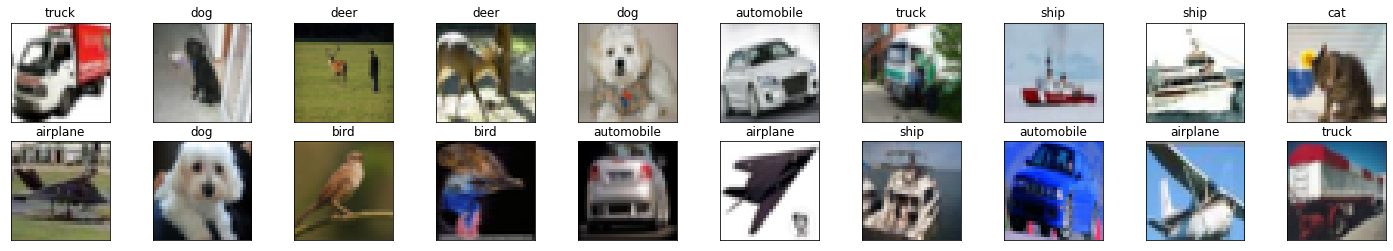

In [5]:
dataiter = iter(train_loader) #Create an iterator over the train_loader
images, labels = dataiter.next() #Each call to .next() grabs another batch of 20 images and their corresponding labels.
images = images.numpy() #Convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4)) #Sizing of images
#Display 20 images by iterating through a single batch, "images"
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx]) #Displays image contents
    ax.set_title(classes[labels[idx]]) #Displays label for each image

### Further visualization of separate color channels

We can further visualize a single image as three grayscale representations, for each of the three color channels in Red(R), Green(G), and Blue(B).

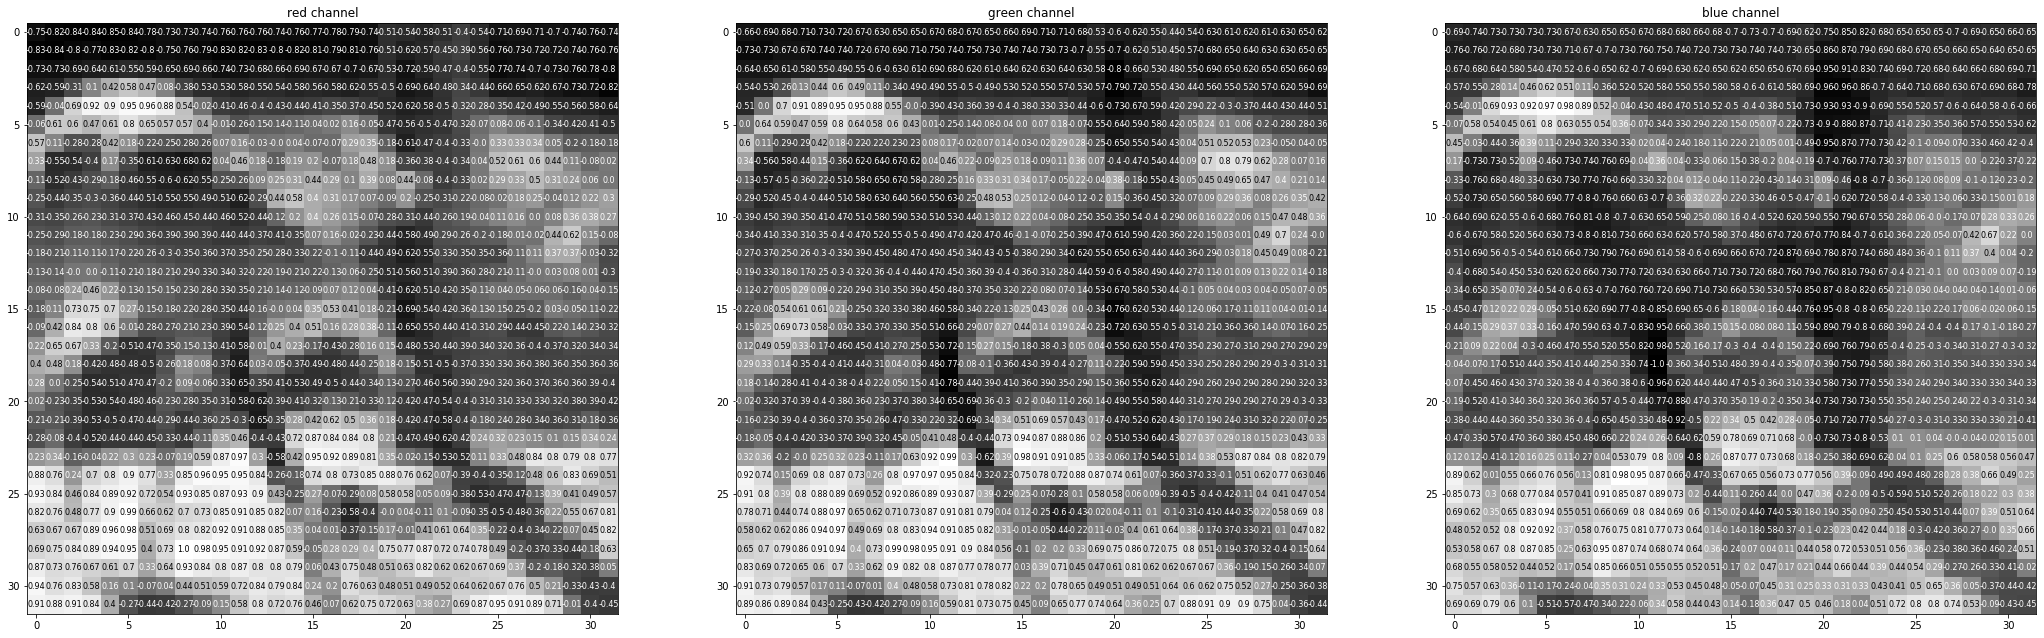

In [6]:
rgb_img = np.squeeze(images[3])
channels = ['red channel', 'green channel', 'blue channel']

fig = plt.figure(figsize = (36, 36)) #Dimensions of each displayed image
for idx in np.arange(rgb_img.shape[0]): #Iterate over 3 RGB channels, for 3 unique image outputs
    ax = fig.add_subplot(1, 3, idx + 1)
    img = rgb_img[idx]
    ax.imshow(img, cmap='gray')
    ax.set_title(channels[idx])
    width, height = img.shape
    thresh = img.max()/2.5
    
    for x in range(width): #Two loops display grayscale values for each pixel?
        for y in range(height):
            val = round(img[x][y],2) if img[x][y] !=0 else 0
            ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center', size=8,
                    color='white' if img[x][y]<thresh else 'black')

<b>Final visualization:</b> some final checks on the dimensions of important data objects and others, to ensure our implementation matches our specified hyperparameters and sizing requirements.

In [7]:
dataiter = iter(train_loader)
images,labels = dataiter.next()

print(f"The dimensions of 'images', which is a single batch: {images.size()}")
print(f"The dimensions of 'labels' in a batch: {labels.size()}")
print(f"The dimensions of a single training example: {images[0].size()}")
print(f"The length of 'train_loader'; how many batches/iterations we have split our training set into: {len(train_loader)}")
print(f"The length of train_data; training dataset size pre-split: {len(train_data)}")
print(f"Length of trainloader.sampler -- total number of training examples: {len(train_loader.sampler)}")
print(f"Length of valid_loader.sampler -- total number of validation examples: {len(valid_loader.sampler)}")
print("\n")
print(f"The length of test_loader; number of batches/iterations: {len(test_loader)}")
print(f"The length of test_loader.dataset: {len(test_loader.dataset)}")

The dimensions of 'images', which is a single batch: torch.Size([20, 3, 32, 32])
The dimensions of 'labels' in a batch: torch.Size([20])
The dimensions of a single training example: torch.Size([3, 32, 32])
The length of 'train_loader'; how many batches/iterations we have split our training set into: 2000
The length of train_data; training dataset size pre-split: 50000
Length of trainloader.sampler -- total number of training examples: 40000
Length of valid_loader.sampler -- total number of validation examples: 10000


The length of test_loader; number of batches/iterations: 500
The length of test_loader.dataset: 10000


---
## Step: Network Architecture

Here, we define the network architecture, based on a Convolutional Neural Network algorithm. This will implement the following main parts:
* 3 Convolution layers: these run our images through a series of specified filters to determine patterns in the pixel data.
* 3 Maxpooling layers: these reduce the overall x-y dimensions of the images, downsampling to remove extraneous information, whike retaining the most important, contributing information.
* 2 Linear layers, with dropout: these help avoid overfitting on the training set, and produce 10-dim output to match the 10 classes.

<img src='notebook_ims/2_layer_conv.png' height=50% width=50% />

In [8]:
import torch.nn as nn
import torch.nn.functional as F #Convolution functions module

#nn.Sequential is a viable alternative to manual class definition
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # convolutional layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1) #3 color channels; apply 16 filters;
        #3x3 kernel, with 1-pixel padding border
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1) #In_channels is output channels from previous convolutional layer.
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1) #Final application of 64 kernels.
        # max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2) #Downsamples feature maps by 2 on each application.
        # linear layer (64 * 4 * 4 -> 500)
        self.fc1 = nn.Linear(64 * 4 * 4, 500) 
        # linear layer (500 -> 10)
        self.fc2 = nn.Linear(500, 10)
        # dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x))) #Run our sequence of three conv, activation, and pool functions.
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        # flatten image input
        x = x.view(-1, 64 * 4 * 4)
        
        # add dropout layer
        x = self.dropout(x)
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer, with relu activation function
        x = self.fc2(x)
        return x

# create a complete CNN
model = Net()
print(model)

# move tensors to GPU if CUDA is available
if train_on_gpu:
    model.cuda()

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


<b>Important notes</b>: A possible area of confusion is the number of in_channels and out_channels, and the x-y dimensions of each
image example. Each training image starts out with dimensions of 3,32,32. The Convolution layers apply filters to each training example of sizes 16, 32, and 64, where each example originally has only 3 channels (one from each RGB color):
3-->16-->32-->64 total channels

The convolution filters themselves, and the pool filters, may also affect the x-y dimensions of each example, which are originally 32x32 in size. The convolution filters's possible changes to x-y dimensions of each image can be calculated with the following formula:
((W-F+2P)/S)+1, where W is the width(x) or height(y) of a single example, F is the filter square side length, P is the padding value, and S is the stride of the filter movement. After we apply each convolutional layer, each maxpool also downsamples each image's x-y dimensions by 2. The calculations are as follows:
Conv1: ((32-3+2(1))/1)+1=32
MaxPool: 32/2 = 16
Conv2: ((16-3+2(1))/1)+1=16
MaxPool: 16/2 = 8
Conv3: ((8-3+2(1))/1)+1=8
MaxPool: 8/2 = 4

Note that the Convolutional filters we use in this case do not affect the x-y dimensions of an image; only the MaxPool application changes the x-y dimensions by downsampling by 2, resulting in a final x-y dimension, for each image, of 4x4.

After all Convolution and Maxpool layers are applied, each image tensor has a resulting size of 64 x 4 x 4, where 64 is the number of final feature maps per image, and 4x4 is the x-y dimension of each feature map.

When we reach the flattening step, we want to condense each image tensor into a 1-dimensional array, and thus specify the total number of elements in the tensor as 64x4x4=1024.

The dual appearance of the numbers 32 and 16 is a possible area of confusion; in one case, they refer to the downsampled x-y dimensionality of each image (from Convolution and Maxpooling), and in the other case, they refer to the increasing number of chosen filter maps applied at each convolutional layer.

### Step: Specify Loss Function and Optimizer

The loss function will determine how we calculate the the error between our model's predicted output values for a given set of data, and that data's actual output labels. We decide to go with <b>Cross Entropy Loss</b>.

The optimizer function will minimize the error function -- we decide on <b>Mini-batch Gradient Descent</b>.

In [9]:
import torch.optim as optim

# specify loss function
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

---
## Step: Training the Network

Here, we train our model over our training dataset (40,000 weight-training subset, 10,000 validation subset), over <b>30 epochs</b>, in <b>2000 iteration increments</b>, of <b>20 training examples each (batch size)</b>.
After the completion of each batch, we will calculate the loss, calculate the gradient of the loss wrt the weights, perform a step with the optimizer by updating the weights, and repeat the process for the next batch.

After each epoch, we will run our validation set through the model. We will then print the average training loss per example, and the average validation loss per example -- we expect the training and validation losses to decrease over time. If the validation loss increases, we might suspect possible <b>overfitting</b>.

In [10]:
# number of epochs to train the model
n_epochs = 30

valid_loss_min = np.Inf # track change in validation loss. The validation loss starts out at positve infinity,
#such that the first calculation for valid_loss will necessarily be lesser than, and will replace the positive infinity
#value to start.

for epoch in range(1, n_epochs+1): #For loop specifying 30 epoch iterations total; that is, going through the 
    #entire training data 30 times.

    #Tracks loss for training and validation sets respectively, for a single epoch. We print these at the end of each epoch to
    #visualize progress. At the start of a new epoch, these loss values are zeroed out and cleared, to allow for loss calculations
    #for the new epoch.
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # Train the model #
    ###################
    
    model.train() #Setting our model to "training mode"
    for data, target in train_loader: #Trainloader has two primary dimensions: the image data (the 40,000 training examples' 
        #pixel data across 3 color channels), and the 40,000 labels, where each training exampel has a single label. These
        #are called "data" and "target", respectively, in this for loop.
        #This loop occurs for each of the 2000 batches/iterations in train_loader, each consisting of 20 training examples.
        #Remember, in Mini-batch Gradient Descent, we do a loss calculation, gradient calculation, and weight update after 
        #we go through each batch -- in this case, after we plug in 20 training examples. We will do this 2000 times, to get
        #through the entire 40,000 training examples. 
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        optimizer.zero_grad() #At the beginning of each new batch calculation, we have to clear out the gradients from
        #the previous batch.
        # forward pass: compute predicted outputs by passing inputs to the model. We want to compare these to the actual 
        #labels in "target".
        output = model(data)
        # calculate the loss for the current batch: the Cross Entropy Loss between our model's predicted labels for all 20 training 
        #examples, and the actual labels for all 20 of those same training examples.
        loss = criterion(output, target) 
        # backward pass: compute gradient of the loss with respect to model parameters. We calculate the derivative of
        #our weights wrt the Loss Function output -- we want to find the weights such that the Loss Function is minimized.
        loss.backward()
        # perform a single optimization step (parameter update). We update the weights based on the gradient calculation
        #in the previous step.
        optimizer.step()
        # update training loss. We are tallying up the training loss of all 2000 batches/iterations, in the given epoch.
        train_loss += loss.item()*data.size(0)
        
    #We go through all 40,000 training examples, in 2000 batches, of 20 training examples each. We update the weights
    #2000 times (at the end of every batch of 20 examples). At the end of every batch (every loop in train_loader), we tack on
    #the loss value that we calculated for that batch of 20 examples. This will give us a total loss sum across all 2000 batches.

        
    ######################    
    # Validate the model #
    ######################
    
    #Our next step, at the end of each epoch (that is, after going through all 40,000 training examples), we need to run the 
    #validation set through our model to prevent overfitting.
    model.eval() #Set our model to evaluation mode, so as to not calculate gradients and update weights.
    for data, target in valid_loader: #Iterates over 10,000 validation examples. No batches here -- the full 10k validation
        #set is used.
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss across all 10,000 validation examples.
        loss = criterion(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0) #Similar to our training loss, we sum up the validation loss across
        #all 10,000 validation examples.
        
    ######################
    # validation complete#
    ######################
    
    #Final step for the current epoch: calculate and print loss values for the given epoch
    
    train_loss = train_loss/len(train_loader.sampler)  #calculate average loss per training example, by dividing
    #the total summed losses across a single epoch, by 40,000
    valid_loss = valid_loss/len(valid_loader.sampler)  #calculate average loss per validation example, by dividing
    #the total summed losses from validation, by 10,000.
        
    # print training/validation statistics     
    print(f"Epoch: {epoch} \tTraining Loss: {round(train_loss,3)} \tValidation Loss: {round(valid_loss,3)}")
    
    #Model save condition: only save new weights to the model if the validation loss has decreased! Increasing validation loss
    #may suggest overfitting, in which case hyperparameters may need to be adjusted.
    if valid_loss <= valid_loss_min:
        print(f'Validation loss decreased ({round(valid_loss_min,3)} --> {round(valid_loss,3)}).  Saving model ...')
        torch.save(model.state_dict(), 'model_cifar.pt') #Save current model
        valid_loss_min = valid_loss #Replace previous minimum validation loss with the validation loss from most recent
        #model state
        
    #Epoch completed! Loop back and start again for next iteration.

Epoch: 1 	Training Loss: 1.603 	Validation Loss: 1.467
Validation loss decreased (inf --> 1.467).  Saving model ...
Epoch: 2 	Training Loss: 1.457 	Validation Loss: 1.34
Validation loss decreased (1.467 --> 1.34).  Saving model ...
Epoch: 3 	Training Loss: 1.343 	Validation Loss: 1.257
Validation loss decreased (1.34 --> 1.257).  Saving model ...
Epoch: 4 	Training Loss: 1.253 	Validation Loss: 1.152
Validation loss decreased (1.257 --> 1.152).  Saving model ...
Epoch: 5 	Training Loss: 1.175 	Validation Loss: 1.103
Validation loss decreased (1.152 --> 1.103).  Saving model ...
Epoch: 6 	Training Loss: 1.107 	Validation Loss: 1.02
Validation loss decreased (1.103 --> 1.02).  Saving model ...
Epoch: 7 	Training Loss: 1.047 	Validation Loss: 0.979
Validation loss decreased (1.02 --> 0.979).  Saving model ...
Epoch: 8 	Training Loss: 0.993 	Validation Loss: 0.958
Validation loss decreased (0.979 --> 0.958).  Saving model ...
Epoch: 9 	Training Loss: 0.946 	Validation Loss: 0.905
Validatio

###  Load the Model with the Lowest Validation Loss

In [10]:
model.load_state_dict(torch.load('model_cifar.pt'))

<All keys matched successfully>

---
## Step: Test the Trained Network

Next, after loading the model with the lowest validation loss (our best-performing model), we move to run our test set of 
10,000 examples through the model. This is to check that the model performance can be generalized to data not present in the original training and validation sets.

In [11]:
test_loss = 0.0
class_correct = list(0. for i in range(10)) #Will house how many classes we correctly predicted
class_total = list(0. for i in range(10)) #Houses how many outputs of each class are present in the test set.

model.eval() #Set model to evaluation mode, similar to validation step.
#iterate over test data
for data, target in test_loader: #Iterating over all 10,000 test examples, in 500 batches of 20 examples each.
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0) #Calculate the loss for each batch of 20? 
    
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)   #Dimension=1 compares element columns. The maximum value would be the class with the 
    #highest predicted value for that example, and thus would be the proposed predicted class depicted in the image. 
    #"Pred" holds the index for the maximum probabilities (that is, the predicted class) across all test examples.
    #We don't use the first returned value in the tuple, "_,", since that gives us the raw probability (ex, 0.87),
    #Which we don't really need. We just want the index with the highest probability, which corresponds to the 
    #predicted class for that example.

    #The following line sets "target" to be viewed in the same format as "pred", so they can be fairly compared.
    #Then, pred.eq compares each pair of values, and returns "True" for equal values, and "False" for non-equal values.
    #This is essentially checking that "pred" has the same predicted class index, for each test example, as "target". Remember,
    #"target" is the actual 10,000 labels for the 10,000 test examples, while "pred" is the proposed 10,000
    #labels for each of those same 10,000 test examples, according to our model.
    correct_tensor = pred.eq(target.data.view_as(pred))
    
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    for i in range(batch_size): #Twenty times; with each iteration in the loop, it grabs "i" for one out of
        #20 training examples in the current batch. i goes from 0->19.
        label = target.data[i] #Grabs the target (the actual class index) for the current test example, i out of 20 examples, 
        #and sets it to label. So, if the current example i=2 has a target value of class=4="cat", then label=4.
        class_correct[label] += correct[i].item() #This adds a value of 1 to the class that is labeled for the current test
        #example, if and only if, for the current test example, the "correct" element at index "i" has a boolean value
        #of "true". That is, if we got the class label for the current test example correct, then we tally a new instance of
        #a correct prediction, for that class, in our "class_correct" tensor. 
        
        class_total[label] += 1 #This just tallies up how many classes total are represented in the test examples. 

#The following is done AFTER all test examples are run through the model -- this is the final check
#of the accuracy of our model performance.
        
# average test loss
test_loss = test_loss/len(test_loader.dataset) #Average loss per test example, by dividing total calculated loss 
#by 10,000 test examples. 
print(f"Average Test Loss: {round(test_loss,6)}\n")

for i in range(10): #Looping through all 10 classes
    if class_total[i] > 0: #If there is at least one instance of the given class as defined by the official labels in our
        #test set
        percent_right = round((class_correct[i]/class_total[i])*100,3) #Calculates % of correct predictions for each class
        print(f"Test Accuracy of {classes[i]}: {percent_right}% ({int(class_correct[i])}/{int(class_total[i])})")
        
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Average Test Loss: 0.723125

Test Accuracy of airplane: 79.8% (798/1000)
Test Accuracy of automobile: 88.3% (883/1000)
Test Accuracy of bird: 65.3% (653/1000)
Test Accuracy of cat: 55.9% (559/1000)
Test Accuracy of deer: 73.6% (736/1000)
Test Accuracy of dog: 64.4% (644/1000)
Test Accuracy of frog: 81.3% (813/1000)
Test Accuracy of horse: 79.6% (796/1000)
Test Accuracy of ship: 85.0% (850/1000)
Test Accuracy of truck: 83.8% (838/1000)

Test Accuracy (Overall): 75% (7570/10000)


### Model weaknesses and areas of potential improvement

More data for training always leads to improvement -- the more data that a model can train on, the more informed the model becomes on any underlying patterns within the data, which it can use to generalize to unseen examples. The next best thing to obtaining more original data would be to use <b>image augmentation</b> on the existing data.

<b>Cross Validation</b> may also provide a more effective model, by not "wasting" any of the total 60,000 examples in the data set. Cross Validation may be most advantageous for small datasets, where opportunities for pattern extract are consequently more limited, but it might provee valuable in this situation anyway, by allowing use of the extra 10,000 examples originally reserved exclusively for testing.

<b>Increasing the number of Convolutional layers</b> (along with associated activation and pooling functions) would increase the depth of our CNN, and possibly result in the extraction of more fundamental, generalizable patterns that could be applied to gain higher accuracy.

### Visualize Sample Test Results

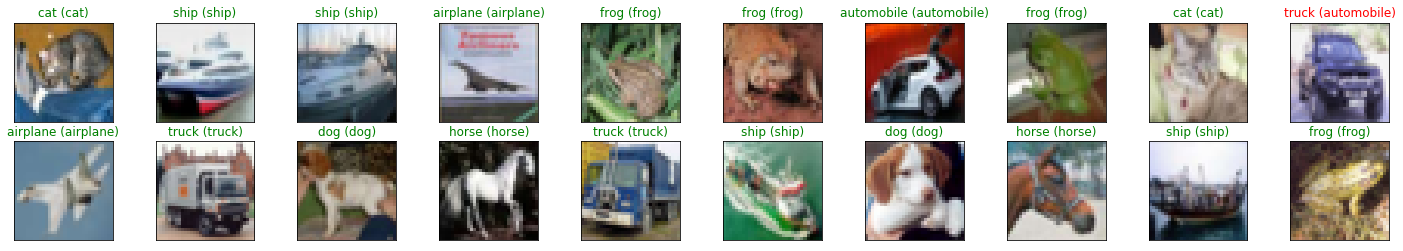

In [14]:
# obtain one batch of test images
dataiter = iter(test_loader) #Testloader is iterated over by dataiter; each call of dataiter.next() gives another
#batch of 20 test examples, which is placed into the images and labels sets.
images, labels = dataiter.next()
images.numpy() #Convert images to numpy array for display

# move model inputs to cuda, if GPU available
if train_on_gpu:
    images = images.cuda()

# get sample outputs
output = model(images) #Run a single batch of 20 examples through our model, and assign to "output"
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1) #Grabs index for maximum probability class for each example.
preds = np.squeeze(preds_tensor.numpy()) if not train_on_gpu else np.squeeze(preds_tensor.cpu().numpy())
#Np.squeeze() removes single-dimensional entries from the shape of an array.

if train_on_gpu:
    images = images.cpu()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx] if not train_on_gpu else images[idx].cpu())
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))